In [1]:
# Cellule de diagnostic et installation des packages
# Exécutez cette cellule en premier si vous avez des erreurs d'import

import sys
print("📍 Python utilisé:", sys.executable)
print("📍 Version Python:", sys.version)

# Installation des packages si nécessaire
packages_a_installer = []

# Packages essentiels pour Jupyter/notebooks
try:
    import IPython
    print("✅ IPython installé, version:", IPython.__version__)
except ImportError:
    print("❌ IPython n'est pas trouvé (requis pour le rendu des notebooks)")
    packages_a_installer.extend(["ipython"])

try:
    import nbformat
    version = nbformat.__version__
    major, minor = map(int, version.split('.')[:2])
    if major >= 4 and minor >= 2:
        print("✅ nbformat installé, version:", version, "(>= 4.2.0)")
    else:
        print(f"⚠️ nbformat version {version} est trop ancienne (requis >= 4.2.0)")
        packages_a_installer.extend(["nbformat>=4.2.0"])
except ImportError:
    print("❌ nbformat n'est pas trouvé (requis pour le rendu des notebooks)")
    packages_a_installer.extend(["nbformat>=4.2.0"])

# Packages de données
try:
    import pandas as pd
    print("✅ Pandas installé, version:", pd.__version__)
except ImportError:
    print("❌ Pandas n'est pas trouvé")
    packages_a_installer.extend(["pandas"])

try:
    import sklearn
    print("✅ scikit-learn installé, version:", sklearn.__version__)
except ImportError:
    print("❌ scikit-learn n'est pas trouvé")
    packages_a_installer.extend(["scikit-learn"])

try:
    import matplotlib
    print("✅ Matplotlib installé, version:", matplotlib.__version__)
except ImportError:
    print("❌ Matplotlib n'est pas trouvé")
    packages_a_installer.extend(["matplotlib"])

try:
    import seaborn as sns
    print("✅ Seaborn installé, version:", sns.__version__)
except ImportError:
    print("❌ Seaborn n'est pas trouvé")
    packages_a_installer.extend(["seaborn"])

try:
    import numpy as np
    print("✅ NumPy installé, version:", np.__version__)
except ImportError:
    print("❌ NumPy n'est pas trouvé")
    packages_a_installer.extend(["numpy"])

try:
    import scipy
    print("✅ SciPy installé, version:", scipy.__version__)
except ImportError:
    print("❌ SciPy n'est pas trouvé")
    packages_a_installer.extend(["scipy"])

try:
    import plotly
    print("✅ Plotly installé, version:", plotly.__version__)
except ImportError:
    print("❌ Plotly n'est pas trouvé")
    packages_a_installer.extend(["plotly"])

# Installation des packages manquants
if packages_a_installer:
    print(f"\n📦 Installation en cours de: {', '.join(packages_a_installer)}...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade"] + packages_a_installer)
    print("✅ Installation terminée. Veuillez redémarrer le kernel et réexécuter cette cellule.")
else:
    print("\n✅ Tous les packages sont installés !")


📍 Python utilisé: c:\Users\Pimi\AppData\Local\Programs\Python\Python314\python.exe
📍 Version Python: 3.14.0 (tags/v3.14.0:ebf955d, Oct  7 2025, 10:15:03) [MSC v.1944 64 bit (AMD64)]
✅ IPython installé, version: 9.7.0
❌ nbformat n'est pas trouvé (requis pour le rendu des notebooks)
✅ Pandas installé, version: 2.3.3
✅ scikit-learn installé, version: 1.7.2
✅ Matplotlib installé, version: 3.10.7
✅ Seaborn installé, version: 0.13.2
✅ NumPy installé, version: 2.3.4
✅ SciPy installé, version: 1.16.3
✅ Plotly installé, version: 6.4.0

📦 Installation en cours de: nbformat>=4.2.0...
✅ Installation terminée. Veuillez redémarrer le kernel et réexécuter cette cellule.


### SETUP

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import plotly.express as px
from pathlib import Path
import os

# Définir le chemin vers le dossier contenant les fichiers CSV
# Le notebook est dans "P11 Produisez une étude de marché avec Python\Livrable"
# Le dossier de données est dans "P11 Produisez une étude de marché avec Python\Données du projet"

# Détection automatique du chemin vers le dossier de données
repertoire_actuel = Path(os.getcwd())
print(f"📍 Répertoire de travail actuel: {repertoire_actuel}")

# Essayer plusieurs méthodes pour trouver le dossier de données
dossier_donnees_candidats = [
    # Méthode 1: Chemin relatif depuis la racine du projet
    Path('P11 Produisez une étude de marché avec Python') / 'Données du projet',
    # Méthode 2: Chemin relatif depuis Livrable (si on est dans Livrable)
    Path('../Données du projet'),
    # Méthode 3: Chemin absolu
    Path(r'C:\Users\Pimi\Documents\Formation Data analyst OPC\Github\Projet-formation-OPC\P11 Produisez une étude de marché avec Python\Données du projet'),
    # Méthode 4: Si on est dans la racine du projet
    Path('P11 Produisez une étude de marché avec Python/Données du projet'),
]

# Trouver le premier dossier qui existe
DOSSIER_DONNEES = None
for candidat in dossier_donnees_candidats:
    if candidat.exists():
        DOSSIER_DONNEES = candidat
        break

# Si aucun dossier n'a été trouvé, utiliser le chemin absolu par défaut
if DOSSIER_DONNEES is None:
    DOSSIER_DONNEES = Path(r'C:\Users\Pimi\Documents\Formation Data analyst OPC\Github\Projet-formation-OPC\P11 Produisez une étude de marché avec Python\Données du projet')
    print(f"⚠️ Aucun dossier trouvé avec les chemins relatifs, utilisation du chemin absolu")

print(f"📁 Dossier de données utilisé: {DOSSIER_DONNEES.absolute()}")
print(f"📁 Dossier existe: {DOSSIER_DONNEES.exists()}")

if not DOSSIER_DONNEES.exists():
    print(f"❌ ERREUR: Le dossier de données n'existe pas !")
    print(f"   Vérifiez que le dossier existe à: {DOSSIER_DONNEES.absolute()}")
else:
    print(f"✅ Dossier de données trouvé avec succès !")


📍 Répertoire de travail actuel: c:\Users\Pimi\Documents\Formation Data analyst OPC\Github\Projet-formation-OPC\P11 Produisez une étude de marché avec Python\Livrable
📁 Dossier de données utilisé: c:\Users\Pimi\Documents\Formation Data analyst OPC\Github\Projet-formation-OPC\P11 Produisez une étude de marché avec Python\Livrable\..\Données du projet
📁 Dossier existe: True
✅ Dossier de données trouvé avec succès !


In [3]:
df_etude = pd.read_csv(DOSSIER_DONNEES / 'df_joint_dispo_population_mapping_pib.csv')
df_etude_for_k_means = pd.read_csv(DOSSIER_DONNEES / 'df_joint_dispo_population_mapping_pib.csv')

In [4]:
df_etude.head()

,Country Code,Zone,Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Population 2017 (en millier),Evolution démographique 2012-2017,PIB/habitant 2017($),Evolution PIB 2012-2017
0,AFG,AFGHANISTAN,57.0,29.0,55.0,28.0,36296.113,0.164779,525.469771,-0.193344
1,ZAF,AFRIQUE DU SUD,2118.0,514.0,2035.0,1667.0,57009.756,0.079063,6618.335083,-0.180593
2,ALB,ALBANIE,47.0,38.0,47.0,13.0,2884.169,-0.010270,4614.047969,0.092769
3,DZA,ALGÉRIE,277.0,2.0,264.0,275.0,41389.189,0.107140,4554.667540,-0.245122
4,DEU,ALLEMAGNE,1739.0,842.0,1609.0,1514.0,82658.409,0.020819,45526.599958,0.017682


In [5]:
names = df_etude['Zone']
names

0         AFGHANISTAN
1      AFRIQUE DU SUD
2             ALBANIE
3             ALGÉRIE
4           ALLEMAGNE
            ...      
147           URUGUAY
148           VANUATU
149          VIÊT NAM
150            ZAMBIE
151          ZIMBABWE
Name: Zone, Length: 152, dtype: object

# ACP

### Eboulis des valeurs propres

In [6]:
x = df_etude.select_dtypes(include='number') # Garde uniquement les colonnes numériques
x_scaled = StandardScaler().fit_transform(x) # Standardisation

In [7]:
idx = ["mean", "std"]

pd.DataFrame(x_scaled).describe().round(4).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0033,1.0033,1.0033,1.0033,1.0033,1.0033,1.0033,1.0033


In [8]:
n_components = 8

In [9]:
pca = PCA(n_components=n_components)  
X_pca = pca.fit_transform(x_scaled)

In [10]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([4.534e+01, 1.678e+01, 1.518e+01, 9.010e+00, 8.230e+00, 5.340e+00,
       1.100e-01, 1.000e-02])

In [11]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 45.,  62.,  77.,  86.,  95., 100., 100., 100.])

In [12]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8]

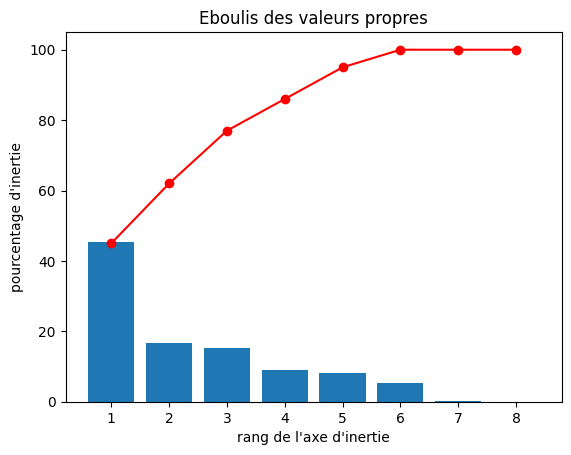

In [13]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

Avec les 2 1eres variables synthetiques on peut garder + de 60% de l'information

## Composantes

In [14]:
pcs = pca.components_
pcs


array([[ 5.17398031e-01,  1.88260799e-01,  5.15468851e-01,
         5.06529836e-01,  3.95898110e-01, -9.15455399e-02,
         9.42033272e-02,  2.42150992e-02],
       [-5.61960398e-02,  4.99596821e-01, -5.07880312e-02,
        -6.45200001e-02, -2.45477627e-01, -3.88057538e-01,
         6.65377842e-01, -2.94834150e-01],
       [-4.51499511e-02, -2.48794978e-01, -4.73853212e-02,
        -2.74091586e-02,  4.99422350e-02, -6.22428229e-01,
         1.51707886e-01,  7.21206975e-01],
       [-9.77607954e-02,  7.89188221e-01, -1.10628328e-01,
        -1.98513416e-01,  2.26754208e-01,  1.44842437e-03,
        -4.01619032e-01,  3.21342745e-01],
       [-1.83471887e-02,  6.42490758e-02, -1.86370944e-02,
        -3.56883416e-02,  5.46030014e-02,  6.68996191e-01,
         5.65278998e-01,  4.73113835e-01],
       [-1.75717506e-01, -1.48356910e-01, -2.09674389e-01,
        -2.56843901e-01,  8.49429229e-01, -7.70455423e-02,
         2.10919285e-01, -2.55398650e-01],
       [-4.05693875e-01,  6.399766

In [15]:
pcs = pd.DataFrame(pcs)
pcs


,0,1,2,3,4,5,6,7
0,0.517398,0.188261,0.515469,0.506530,0.395898,-0.091546,0.094203,0.024215
1,-0.056196,0.499597,-0.050788,-0.064520,-0.245478,-0.388058,0.665378,-0.294834
2,-0.045150,-0.248795,-0.047385,-0.027409,0.049942,-0.622428,0.151708,0.721207
3,-0.097761,0.789188,-0.110628,-0.198513,0.226754,0.001448,-0.401619,0.321343
4,-0.018347,0.064249,-0.018637,-0.035688,0.054603,0.668996,0.565279,0.473114
5,-0.175718,-0.148357,-0.209674,-0.256844,0.849429,-0.077046,0.210919,-0.255399
6,-0.405694,0.063998,-0.442170,0.794785,0.062640,0.010897,-0.007545,0.004487
7,0.722319,-0.003237,-0.690944,-0.013422,-0.025661,0.001044,0.000845,0.000696


In [16]:
features = df_etude[['Disponibilité intérieure','Importations - Quantité','Nourriture','Production','Population 2017 (en millier)', 'Evolution démographique 2012-2017', 'PIB/habitant 2017($)', 'Evolution PIB 2012-2017']]

In [17]:
features = features.columns

In [18]:
pcs.columns = features 
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Population 2017 (en millier),Evolution démographique 2012-2017,PIB/habitant 2017($),Evolution PIB 2012-2017
F1,0.52,0.19,0.52,0.51,0.40,-0.09,0.09,0.02
F2,-0.06,0.50,-0.05,-0.06,-0.25,-0.39,0.67,-0.29
F3,-0.05,-0.25,-0.05,-0.03,0.05,-0.62,0.15,0.72
F4,-0.10,0.79,-0.11,-0.20,0.23,0.00,-0.40,0.32
F5,-0.02,0.06,-0.02,-0.04,0.05,0.67,0.57,0.47
F6,-0.18,-0.15,-0.21,-0.26,0.85,-0.08,0.21,-0.26
F7,-0.41,0.06,-0.44,0.79,0.06,0.01,-0.01,0.00
F8,0.72,-0.00,-0.69,-0.01,-0.03,0.00,0.00,0.00


In [19]:
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8
Disponibilité intérieure,0.517398,-0.056196,-0.045150,-0.097761,-0.018347,-0.175718,-0.405694,0.722319
Importations - Quantité,0.188261,0.499597,-0.248795,0.789188,0.064249,-0.148357,0.063998,-0.003237
Nourriture,0.515469,-0.050788,-0.047385,-0.110628,-0.018637,-0.209674,-0.442170,-0.690944
Production,0.506530,-0.064520,-0.027409,-0.198513,-0.035688,-0.256844,0.794785,-0.013422
Population 2017 (en millier),0.395898,-0.245478,0.049942,0.226754,0.054603,0.849429,0.062640,-0.025661
Evolution démographique 2012-2017,-0.091546,-0.388058,-0.622428,0.001448,0.668996,-0.077046,0.010897,0.001044
PIB/habitant 2017($),0.094203,0.665378,0.151708,-0.401619,0.565279,0.210919,-0.007545,0.000845
Evolution PIB 2012-2017,0.024215,-0.294834,0.721207,0.321343,0.473114,-0.255399,0.004487,0.000696


<Axes: >

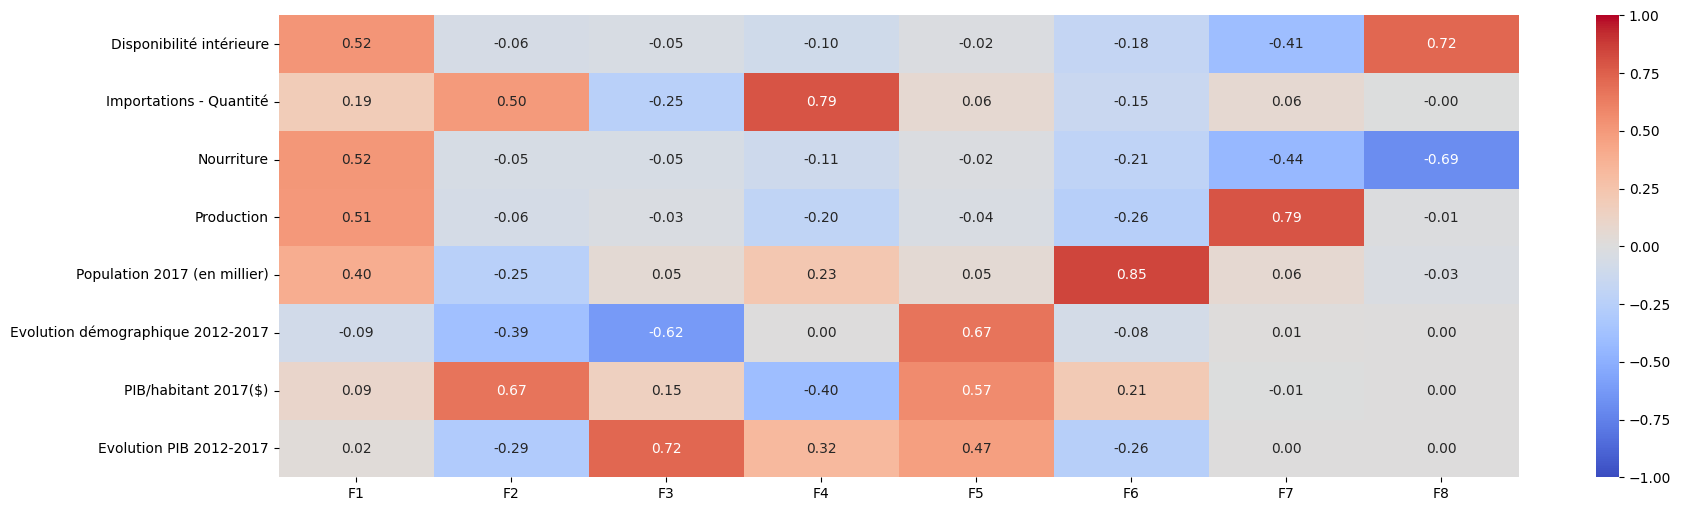

In [20]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

F1 = capacité du production du poulet
F2 = critère socio-économique et démographique

## Corrélation graph

In [21]:
x, y = 0,1

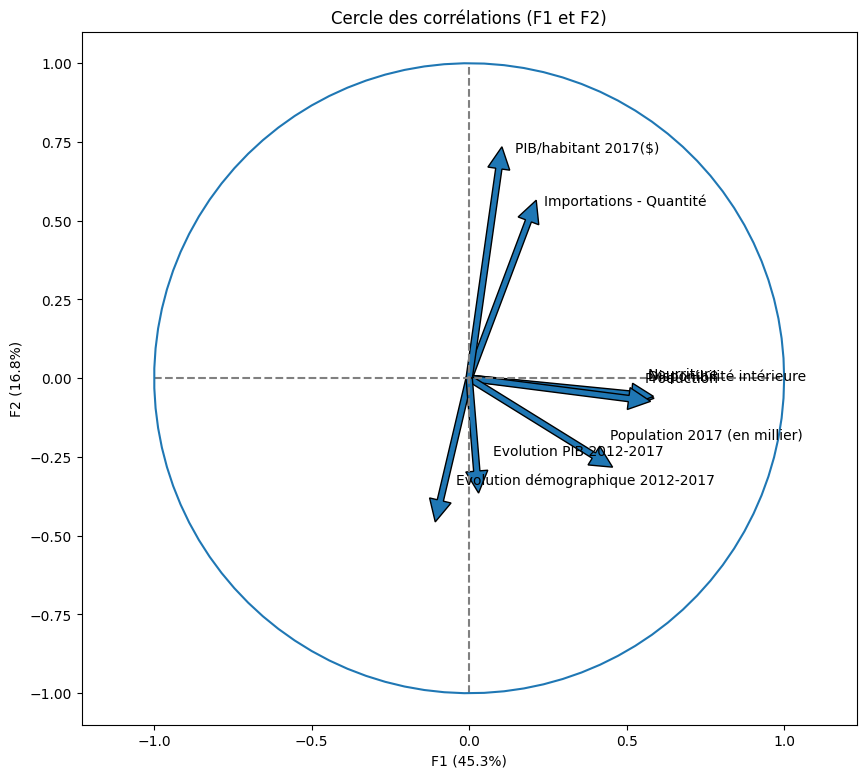

In [22]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

F1 = Nourriture + Dispo intérieur = corrélation positive forte
F2 = PIB/habitant + Importation = corrélation positive forte

## Projection

In [23]:
X_proj = pca.transform(x_scaled)
X_proj[:5]

array([[-0.73818095, -0.88491485, -1.59013029, -0.16056689,  0.12131716,
         0.15923916,  0.0123102 , -0.00792265],
       [ 1.19727814,  0.96858017, -1.4452987 ,  1.5250833 , -0.42531653,
        -0.4719706 , -0.08354542,  0.00920411],
       [-0.52778326,  0.04352434,  0.86362373,  0.09430336, -1.02766216,
        -0.04971931, -0.02442897, -0.00521233],
       [-0.51251665, -0.44366311, -1.12889262, -0.45730189, -0.4533196 ,
         0.30961054, -0.01210338, -0.00557123],
       [ 1.67416257,  3.31964931, -0.45695887,  2.44068789,  0.62502792,
        -0.21301231,  0.12339183,  0.01347799]])

In [24]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ,
                                point_size=100,
                                palette=None
                                ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    point_size : int, la taille des points sur le graphique.
    palette : dict, un dictionnaire qui mappe les numéros de clusters aux couleurs.
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette=palette, s=point_size)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

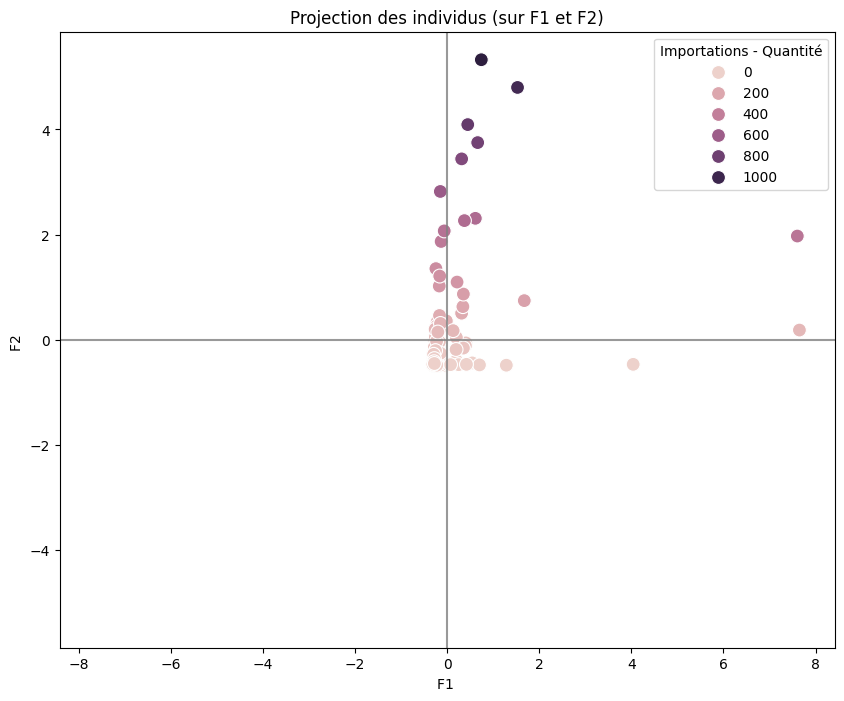

In [25]:
x_y = [0,1]
display_factorial_planes(x_scaled, x_y, clusters=df_etude['Importations - Quantité'])

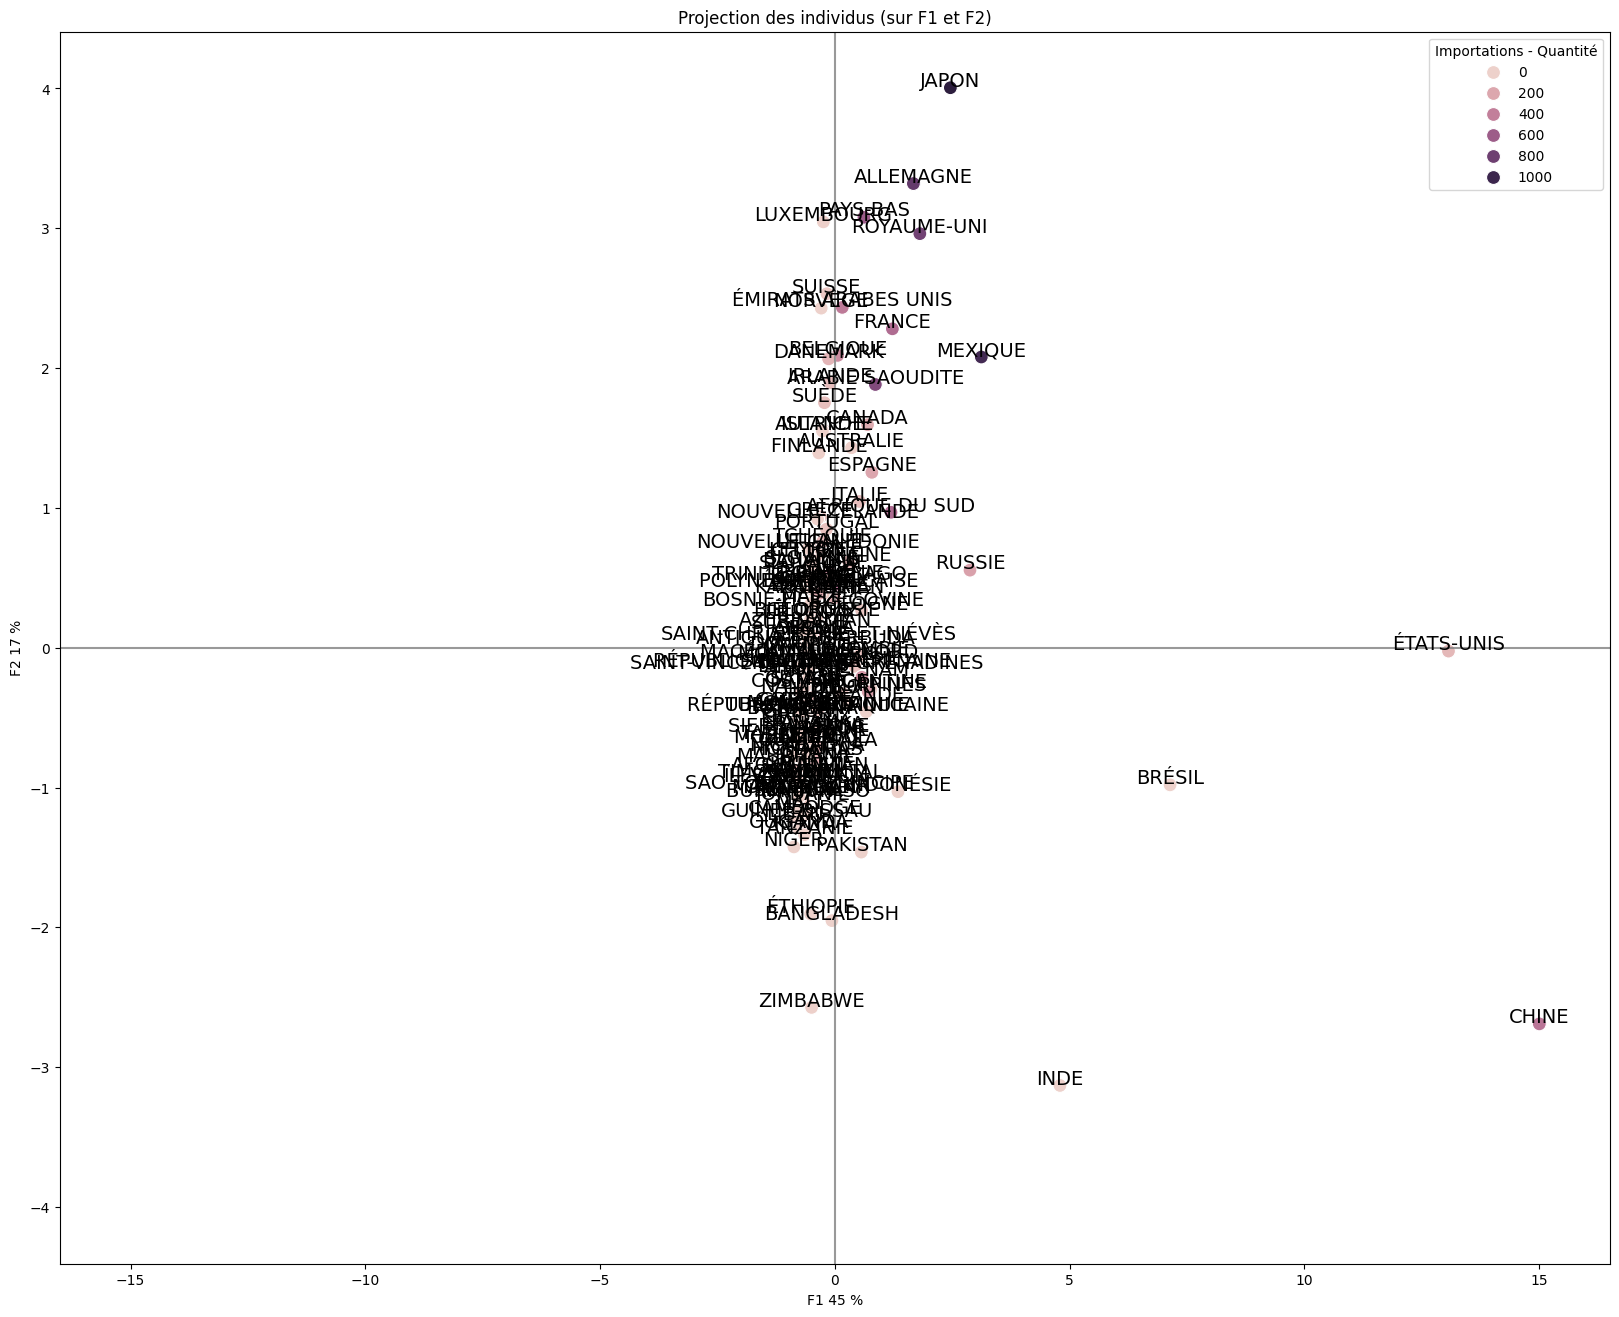

In [26]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=df_etude['Importations - Quantité'], marker="o")

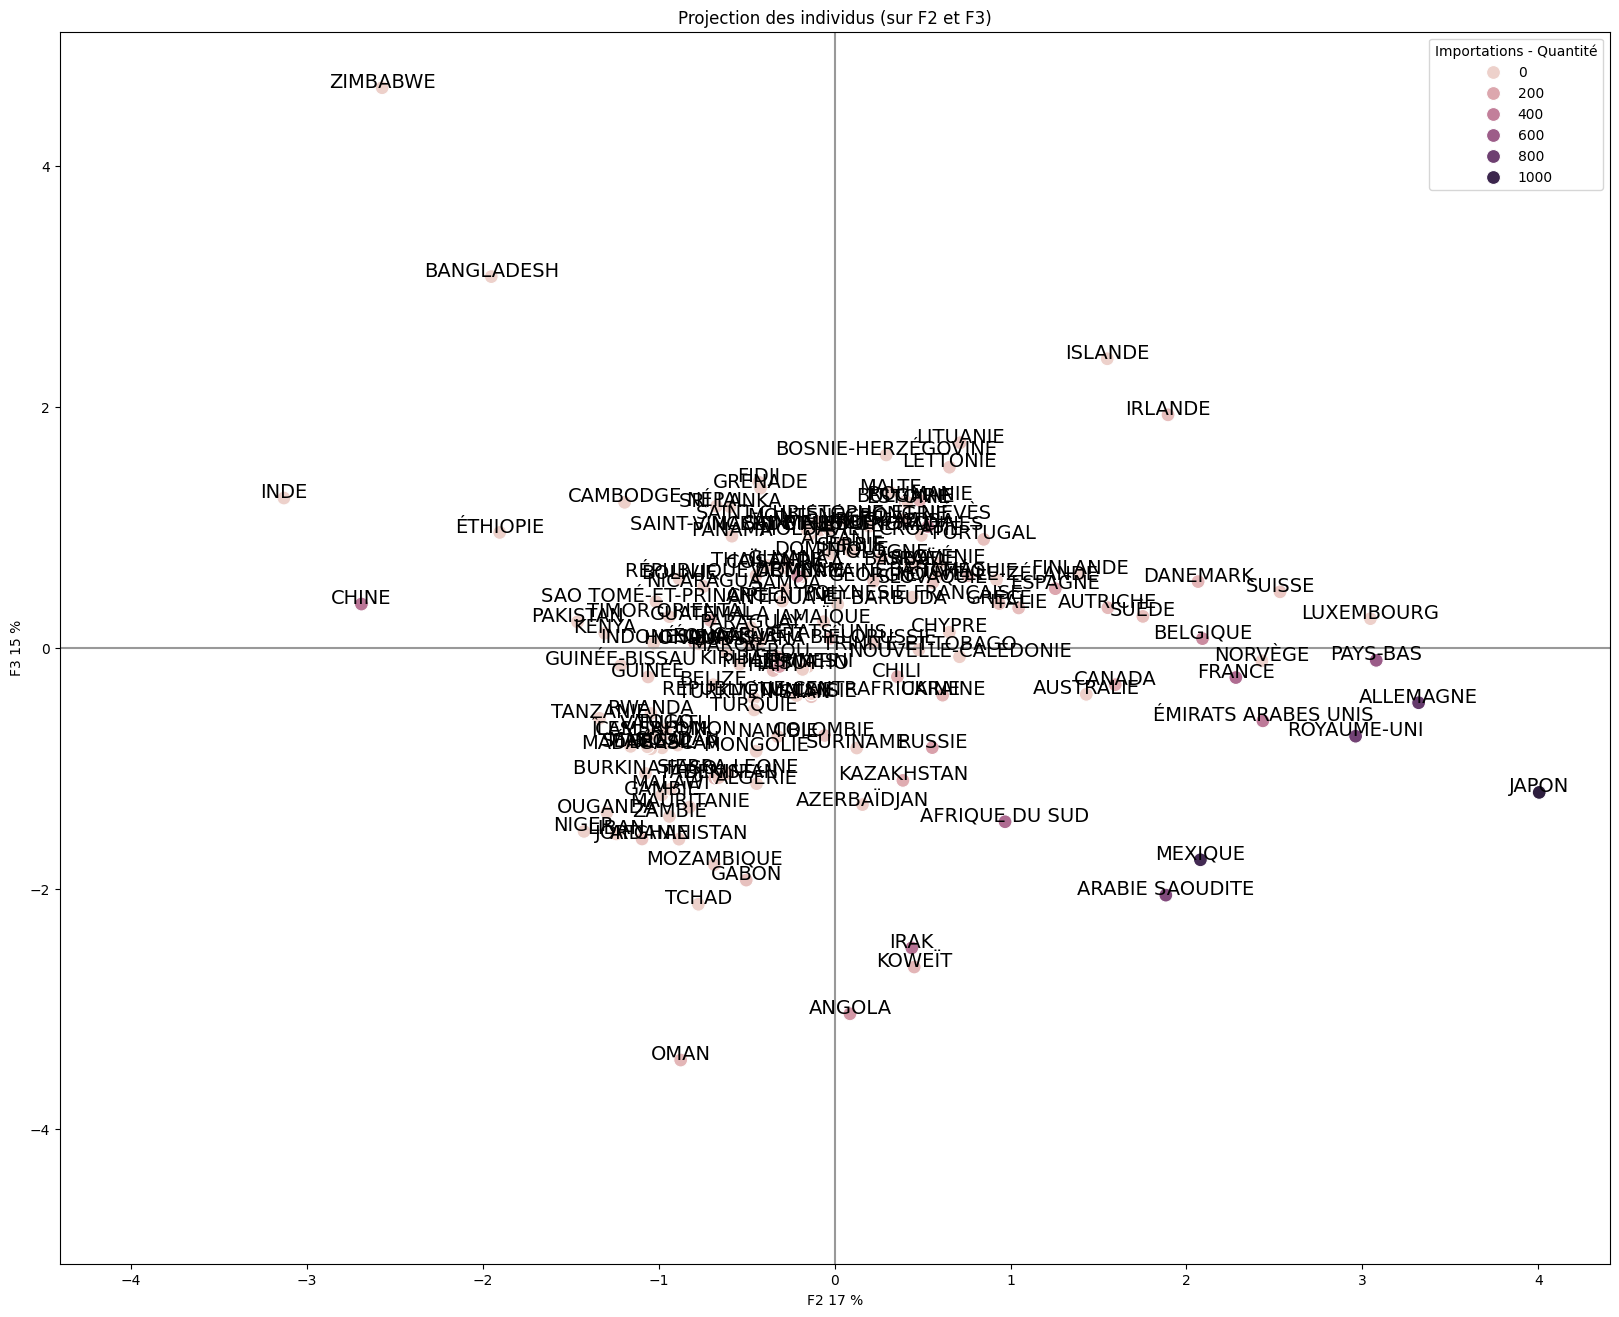

In [27]:
x_y = 1,2
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=df_etude['Importations - Quantité'],marker="o")

# Clustering des pays via la CAH

In [28]:
# **Prendre les données standardisées et non de l'ACP**

# Kmeans : on utilise la méthode du coude pour voir combien de groupes on veut. Supposons 4 groupes : on place 4 points de façon aléatoire et pour chaque point on essaye de voir les pays qui sont les plus proches 

# CAH : classification ascendante hiérarchique groupe les pays qui se ressemblent 2 par 2 et on construit une arborescence (dendrogramme)


### Dendogramme

In [29]:
Z = linkage(x_scaled, method="ward")
Z[:10]

array([[6.30000000e+01, 1.48000000e+02, 7.71537979e-02, 2.00000000e+00],
       [2.80000000e+01, 1.26000000e+02, 1.28206520e-01, 2.00000000e+00],
       [1.20000000e+02, 1.41000000e+02, 1.57696433e-01, 2.00000000e+00],
       [8.40000000e+01, 1.53000000e+02, 1.59723820e-01, 3.00000000e+00],
       [9.40000000e+01, 1.23000000e+02, 1.60767156e-01, 2.00000000e+00],
       [4.30000000e+01, 7.80000000e+01, 1.77261551e-01, 2.00000000e+00],
       [9.10000000e+01, 1.50000000e+02, 1.81590933e-01, 2.00000000e+00],
       [1.25000000e+02, 1.40000000e+02, 1.88029884e-01, 2.00000000e+00],
       [9.30000000e+01, 9.60000000e+01, 1.96063863e-01, 2.00000000e+00],
       [2.20000000e+01, 1.07000000e+02, 1.96591386e-01, 2.00000000e+00]])

In [30]:
pd.DataFrame(x_scaled).describe().round(2).iloc[1:3:, : ]

,0,1,2,3,4,5,6,7
mean,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [31]:
# Sélectionnez uniquement les colonnes de type numérique
df_numerique = df_etude.select_dtypes(include=['number'])

# Maintenant, la vérification va fonctionner
print("Nombre de valeurs infinies par colonne :")
print(np.isinf(df_numerique).sum())

Nombre de valeurs infinies par colonne :
Disponibilité intérieure             0
Importations - Quantité              0
Nourriture                           0
Production                           0
Population 2017 (en millier)         0
Evolution démographique 2012-2017    0
PIB/habitant 2017($)                 0
Evolution PIB 2012-2017              0
dtype: int64


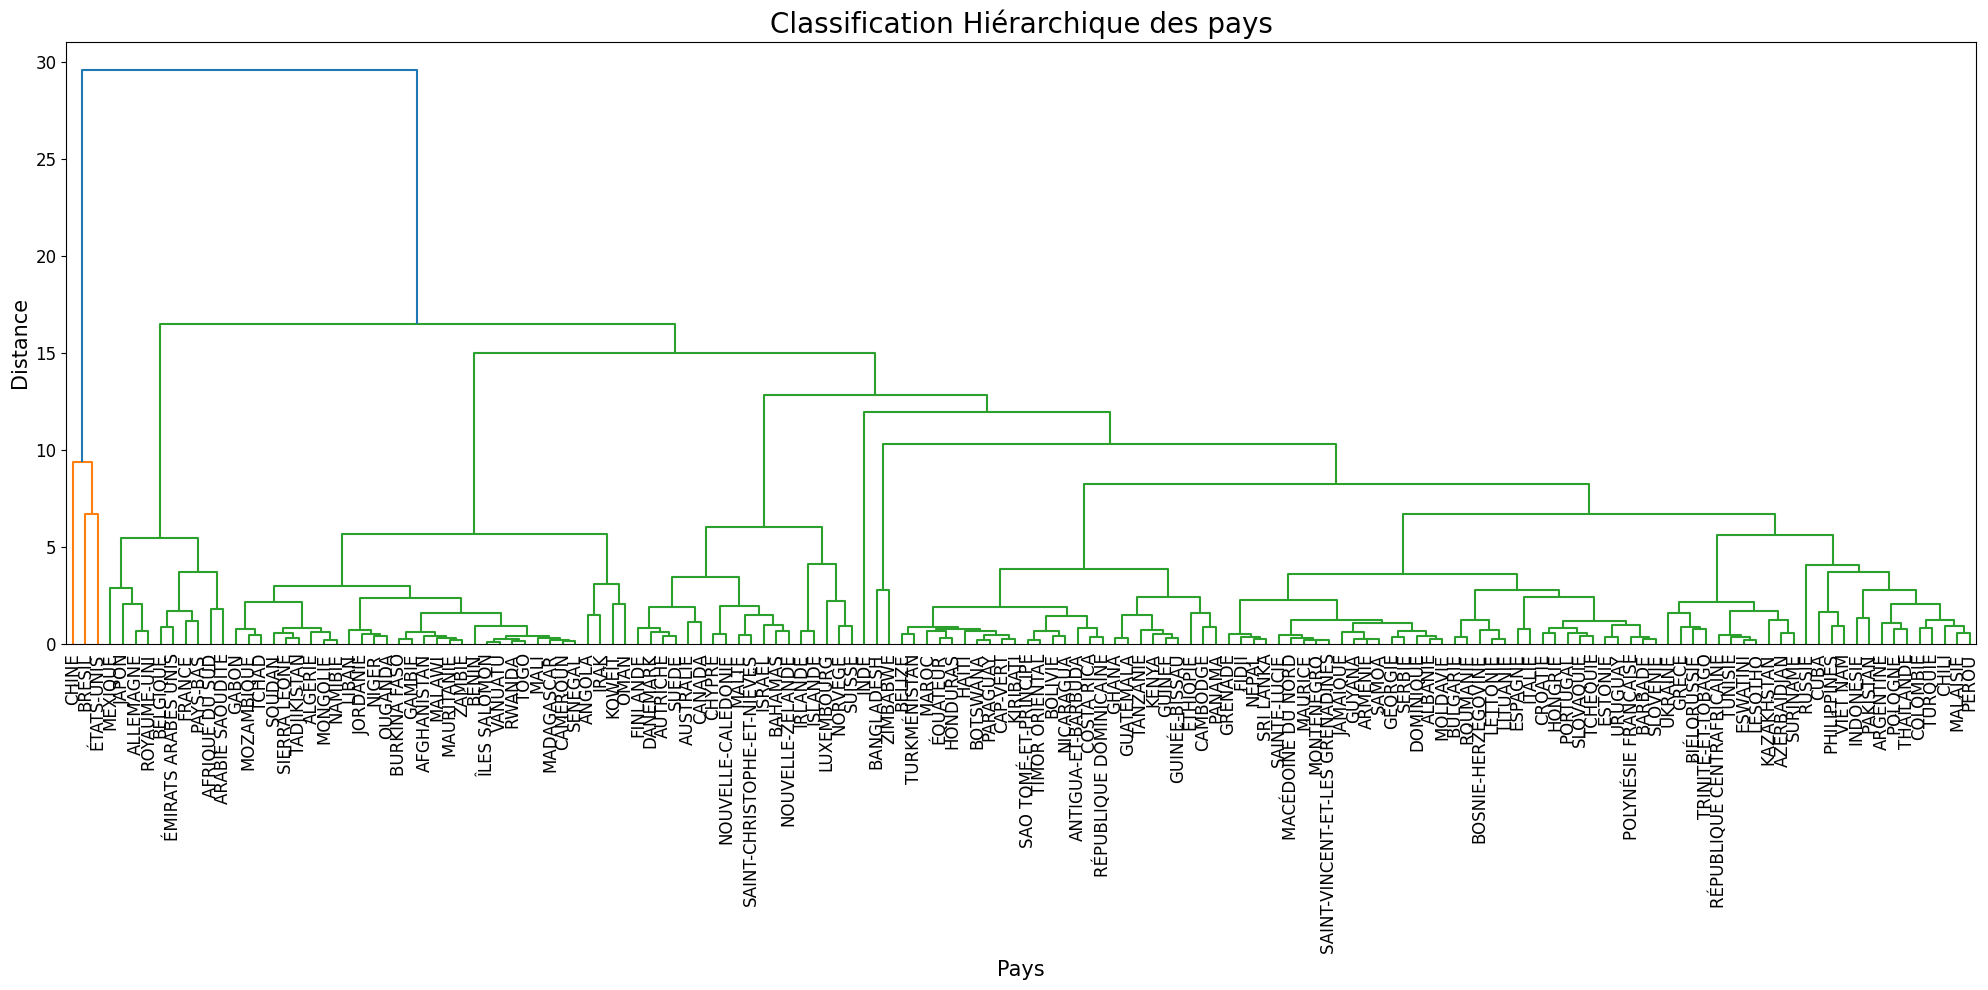

In [32]:
## Nous pouvons désormais affichier le dendrogramme.

## Notez que nous spécifions les labels et l'orientation :

# 1. Séparez les noms de pays et les variables numériques
# C'est l'étape la plus cruciale pour éviter les erreurs.
df_numerique = df_etude.select_dtypes(include=['number'])
names = df_etude['Zone'].tolist()

# 2. Vérification finale (facultatif mais rassurant)
if len(names) != df_numerique.shape[0]:
    print("Erreur critique : le nombre de noms de pays ne correspond pas au nombre de lignes de données.")
else:
    # 3. Standardisation des données
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_numerique)

    # 4. Calcul de la matrice des liaisons (linkage matrix)
    Z = linkage(df_scaled, method='ward')

    # 5. Création et affichage du dendrogramme
    fig, ax = plt.subplots(1, 1, figsize=(20, 10)) # Ajustez la taille pour une meilleure lecture
    _ = dendrogram(Z, ax=ax, labels=names, orientation="top")

    plt.title("Classification Hiérarchique des pays", fontsize=20)
    ax.set_xlabel("Pays", fontsize=15)
    ax.set_ylabel("Distance", fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=12, rotation=90) # Rotation des labels
    ax.tick_params(axis='y', which='major', labelsize=12)

    plt.tight_layout()
    plt.show()

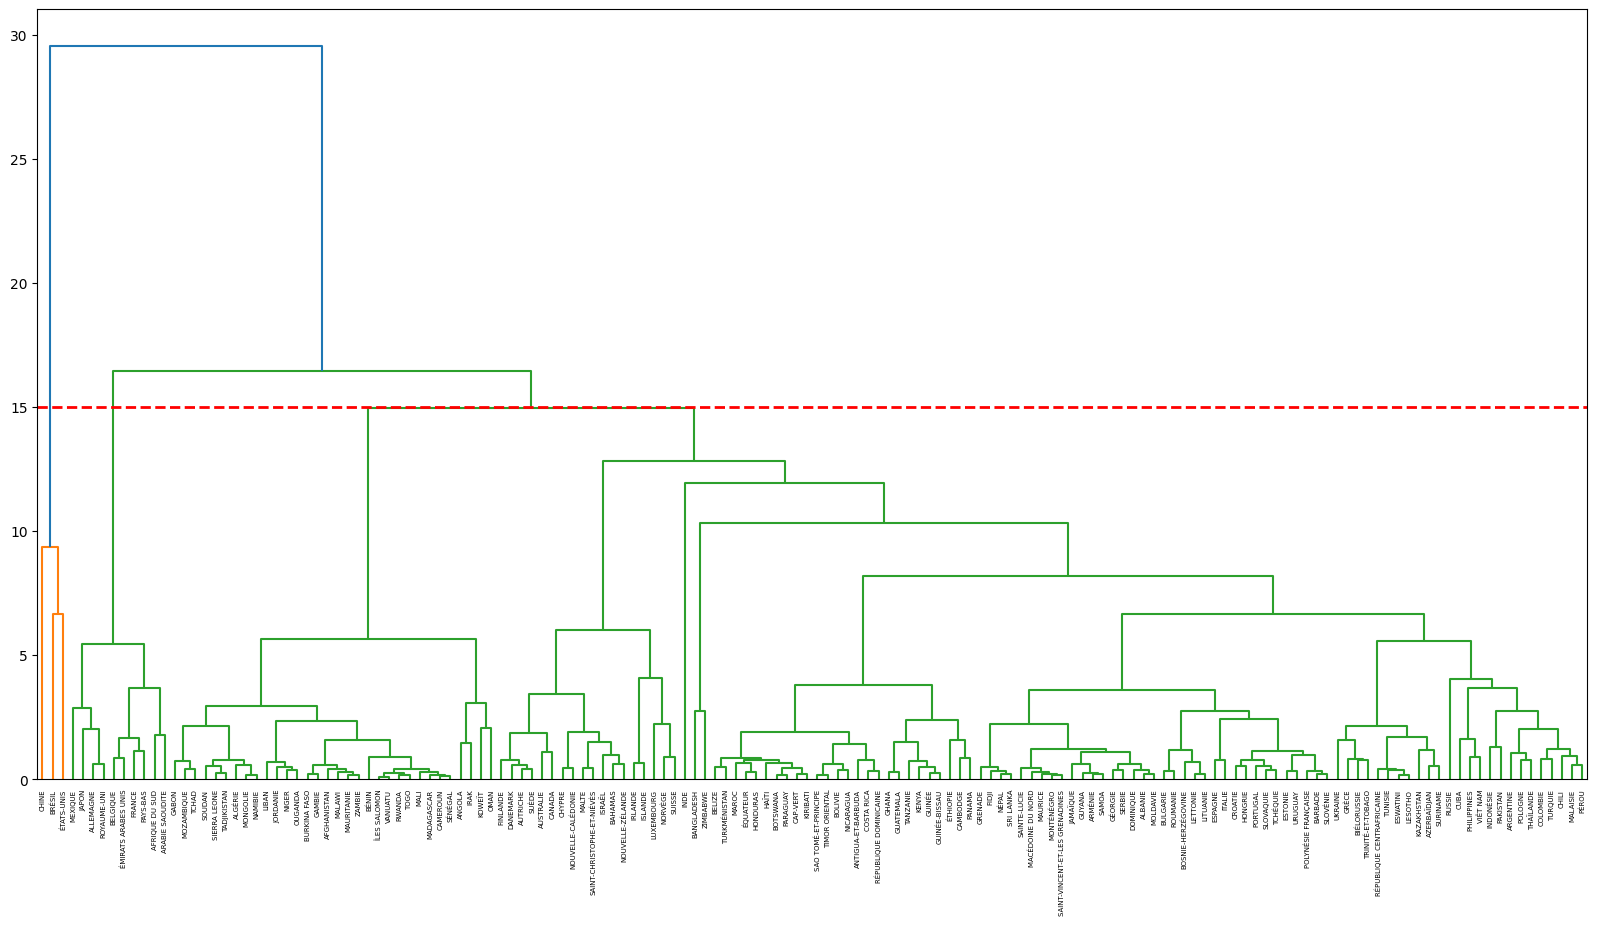

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
_ = dendrogram(Z, ax=ax, labels=names, orientation="top")
ax.axhline(y=15, color='red', linestyle='--', linewidth=2)  # ligne horizontale à distance = 15
plt.show()

### Clusters

In [34]:
## Ensuite, on défini le nombre de clusters que l'on souhaite:
k=4

In [35]:
Z = linkage(x_scaled, method="ward")
Z[:10]

array([[6.30000000e+01, 1.48000000e+02, 7.71537979e-02, 2.00000000e+00],
       [2.80000000e+01, 1.26000000e+02, 1.28206520e-01, 2.00000000e+00],
       [1.20000000e+02, 1.41000000e+02, 1.57696433e-01, 2.00000000e+00],
       [8.40000000e+01, 1.53000000e+02, 1.59723820e-01, 3.00000000e+00],
       [9.40000000e+01, 1.23000000e+02, 1.60767156e-01, 2.00000000e+00],
       [4.30000000e+01, 7.80000000e+01, 1.77261551e-01, 2.00000000e+00],
       [9.10000000e+01, 1.50000000e+02, 1.81590933e-01, 2.00000000e+00],
       [1.25000000e+02, 1.40000000e+02, 1.88029884e-01, 2.00000000e+00],
       [9.30000000e+01, 9.60000000e+01, 1.96063863e-01, 2.00000000e+00],
       [2.20000000e+01, 1.07000000e+02, 1.96591386e-01, 2.00000000e+00]])

In [36]:
cluster_CAH = fcluster(Z, k, criterion='maxclust')
cluster_CAH

array([3, 2, 4, 3, 2, 3, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 3, 4, 4,
       4, 1, 4, 3, 4, 4, 3, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4,
       1, 4, 4, 4, 4, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4,
       3, 4, 4, 4, 4, 4, 2, 3, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 4, 3, 3,
       4, 4, 4, 3, 2, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 4, 2, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 3,
       4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4],
      dtype=int32)

In [37]:
# k = 4
# clusters = fcluster(Z, k, criterion='maxclust')

# 1. Ajoutez les numéros de clusters à votre DataFrame initial
df_etude['cluster_CAH'] = cluster_CAH

# 2. Définissez la liste des features
features_numeriques = df_etude.select_dtypes(include=['number']).columns.tolist()
if 'cluster_CAH' in features_numeriques:
    features_numeriques.remove('cluster_CAH')

# 3. Calculez les moyennes des features pour chaque cluster_CAH
# Le résultat est un DataFrame avec les cluster_CAHs en index
profil_cluster_CAH = df_etude.groupby('cluster_CAH')[features_numeriques].mean()

# 4. Transposez le DataFrame et arrondissez les valeurs
profil_cluster_CAH_transpose = profil_cluster_CAH.T.round(2)

# 5. Affichez le résultat
print(profil_cluster_CAH_transpose)

cluster_CAH                                1         2         3         4
Disponibilité intérieure            15469.67   1666.90     96.91    393.63
Importations - Quantité               192.67    678.30     47.41     43.71
Nourriture                          15200.00   1601.40     93.56    359.81
Production                          18117.00   1443.60     51.81    408.23
Population 2017 (en millier)       651313.46  59454.77  16176.19  33913.41
Evolution démographique 2012-2017       0.03      0.04      0.16      0.04
PIB/habitant 2017($)                26369.30  33976.36   3432.55  15682.42
Evolution PIB 2012-2017                 0.12     -0.10     -0.12      0.12


cluster 1 = pays très peuplé et riche qui produit et consomme beaucoup et importe peu

cluster 2 = pays très riche assez peuplé qui importe massivement consomme pas mal et produise peu

cluster 3 = pays très pauvre et peu peuplé qui produise, importe et consomme peu

cluster 4 = pays légérement pauvre moyennement peuplé qui produise pas mal et importe peu

In [38]:
# Affiche les pays dans chaque cluster
for cluster_id in range(1, k + 1):
    print(f"--- Cluster {cluster_id} ---")
    
    # Sélection des pays appartenant à ce cluster
    pays_du_cluster = df_etude[df_etude['cluster_CAH'] == cluster_id]['Zone']
    
    # Affiche la liste des pays
    print(pays_du_cluster.tolist())
    
    print("\n")

--- Cluster 1 ---
['BRÉSIL', 'CHINE', 'ÉTATS-UNIS']


--- Cluster 2 ---
['AFRIQUE DU SUD', 'ALLEMAGNE', 'ARABIE SAOUDITE', 'BELGIQUE', 'ÉMIRATS ARABES UNIS', 'FRANCE', 'JAPON', 'MEXIQUE', 'PAYS-BAS', 'ROYAUME-UNI']


--- Cluster 3 ---
['AFGHANISTAN', 'ALGÉRIE', 'ANGOLA', 'BÉNIN', 'BURKINA FASO', 'CAMEROUN', 'GABON', 'GAMBIE', 'ÎLES SALOMON', 'IRAK', 'JORDANIE', 'KOWEÏT', 'LIBAN', 'MADAGASCAR', 'MALAWI', 'MALI', 'MAURITANIE', 'MONGOLIE', 'MOZAMBIQUE', 'NAMIBIE', 'NIGER', 'OMAN', 'OUGANDA', 'RWANDA', 'SÉNÉGAL', 'SIERRA LEONE', 'SOUDAN', 'TADJIKISTAN', 'TCHAD', 'TOGO', 'VANUATU', 'ZAMBIE']


--- Cluster 4 ---
['ALBANIE', 'ANTIGUA-ET-BARBUDA', 'ARGENTINE', 'ARMÉNIE', 'AUSTRALIE', 'AUTRICHE', 'AZERBAÏDJAN', 'BAHAMAS', 'BANGLADESH', 'BARBADE', 'BIÉLORUSSIE', 'BELIZE', 'BOLIVIE', 'BOSNIE-HERZÉGOVINE', 'BOTSWANA', 'BULGARIE', 'CAP-VERT', 'CAMBODGE', 'CANADA', 'CHILI', 'CHYPRE', 'COLOMBIE', 'COSTA RICA', 'CROATIE', 'CUBA', 'DANEMARK', 'DOMINIQUE', 'ÉQUATEUR', 'ESPAGNE', 'ESTONIE', 'ESWATINI', '

on prend les pays les plus proche géographiquement pour commencé l'étude

In [39]:
df_etude.describe()

,Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Population 2017 (en millier),Evolution démographique 2012-2017,PIB/habitant 2017($),Evolution PIB 2012-2017,cluster_CAH
count,152.000000,152.000000,152.000000,152.000000,1.520000e+02,152.000000,152.000000,152.000000,152.000000
mean,712.480263,89.177632,678.342105,750.828947,4.404514e+04,0.068053,14517.973925,0.052458,3.598684
std,2302.387842,184.531449,2249.062952,2620.993090,1.620377e+05,0.066040,19151.807760,0.262746,0.702501
min,2.000000,0.000000,2.000000,0.000000,5.204500e+01,-0.070305,432.324026,-0.520793,1.000000
25%,28.750000,3.000000,28.000000,13.000000,2.355447e+03,0.020952,2172.854021,-0.093070,3.000000
50%,94.000000,16.000000,90.500000,68.000000,9.608513e+03,0.056924,6323.207137,0.033929,4.000000
75%,345.750000,79.750000,334.000000,345.250000,2.929529e+04,0.110537,18023.047889,0.171583,4.000000
max,18266.000000,1069.000000,18100.000000,21914.000000,1.421022e+06,0.333873,110193.213797,1.783870,4.000000


In [40]:
# Préparation du DataFrame contenant les informations pour la carte
df_map = df_etude[['Country Code', 'cluster_CAH', 'Zone']].copy()

# Convertion de la colonne 'cluster' en une variable catégorielle pour forcer Plotly à traiter chaque numéro de cluster comme une catégorie distincte
df_map['cluster_CAH'] = df_map['cluster_CAH'].astype('category')

# Création de la carte choroplèthe avec l'échelle de couleurs discrète
fig = px.choropleth(df_map,
                    locations="Country Code",
                    color="cluster_CAH", # Couleurs distinctes
                    hover_name="Zone",
                    color_discrete_sequence=px.colors.qualitative.Plotly, # Choix de palette de couleurs
                    title="Carte choroplèthe des clusters de pays (CAH)")

fig.show()

# Clustering des pays via K-means

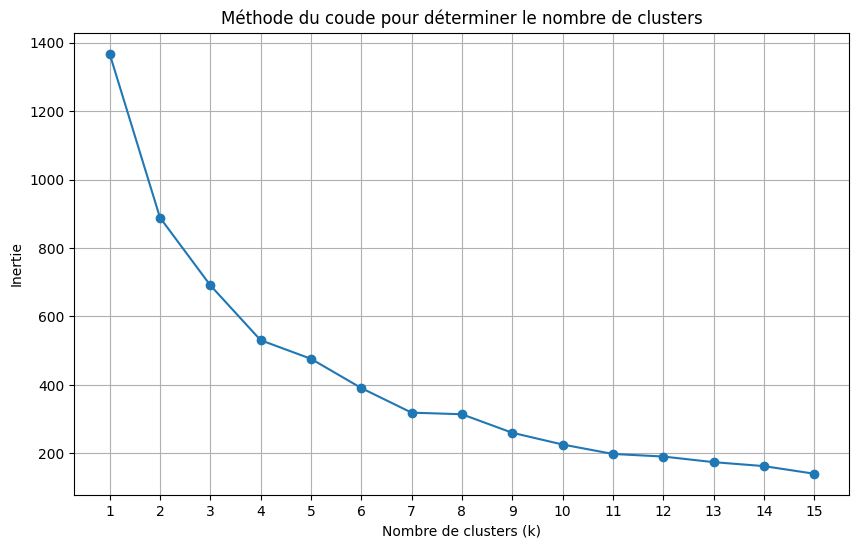

In [41]:
# Séparez les noms de pays et les variables numériques
df_etude = df_etude.select_dtypes(include=['number'])

# Standardisation des données numériques
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_etude)

# Calculez l'inertie pour un nombre de clusters de 1 à 15
inertias = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state=12)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

# Affichez le graphique de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), inertias, marker='o')
plt.title('Méthode du coude pour déterminer le nombre de clusters')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()

##kmean = centroide distance entre les pays et les centroides 
##cah = distance entre pays directement

On a une 1ere cassure à 4 donc on va tester kmeans sur 4 cluster
Essayer a 4 cluster et à 8. Analyser ensuite les clusters de k-mean et comparer avec les cluster de CAH avec les données non standardisé. Regarder le cluster où il y a des pays comme la France. Si on a des pays qui se chevauche dans un cluster c'est ok. Sinon refaire l'analyse avec 7 et 8 clusters 

### Clusterisation sur les variables standardisées

In [42]:
## Centrer et réduire nos données
scaler = StandardScaler()
df_etude_for_k_means_copy = df_etude_for_k_means.select_dtypes(include='number') # Garde uniquement les colonnes numériques
x_scaled = scaler.fit_transform(df_etude_for_k_means_copy)
x_scaled


array([[-0.285637  , -0.32718849, -0.27807258, ...,  1.46950239,
        -0.73302535, -0.93860498],
       [ 0.61247982,  2.30977834,  0.60520437, ...,  0.16726065,
        -0.4138384 , -0.88991433],
       [-0.28999467, -0.27825509, -0.28164138, ..., -1.18992402,
        -0.51883699,  0.15392618],
       ...,
       [ 0.21505986,  1.0973173 ,  0.21754393, ..., -0.22206335,
        -0.60569139,  1.14701178],
       [-0.28432969, -0.41961826, -0.27673429, ...,  1.47464627,
        -0.68283881, -0.70627799],
       [-0.27735741, -0.45224053, -0.27271939, ...,  0.26517324,
        -0.57991819,  6.61146774]], shape=(152, 8))

In [43]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [44]:
wcss

[1216.0,
 788.4095447289112,
 649.844731665919,
 524.390390737391,
 473.0208184010662,
 425.9415166952449,
 317.9489235466257,
 277.3369147309528,
 253.7369439106869,
 232.40057278382764,
 198.82837816936745,
 174.66313026905217,
 165.06511903815223,
 147.54664787986584]

In [45]:
kmeans = KMeans(n_clusters=4)

In [46]:
kmeans.fit(x_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [47]:
cluster_kmeans = kmeans.predict(x_scaled)

In [48]:
df_etude_for_k_means['cluster_kmeans'] = cluster_kmeans
df_etude_for_k_means

,Country Code,Zone,Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Population 2017 (en millier),Evolution démographique 2012-2017,PIB/habitant 2017($),Evolution PIB 2012-2017,cluster_kmeans
0,AFG,AFGHANISTAN,57.0,29.0,55.0,28.0,36296.113,0.164779,525.469771,-0.193344,1
1,ZAF,AFRIQUE DU SUD,2118.0,514.0,2035.0,1667.0,57009.756,0.079063,6618.335083,-0.180593,0
2,ALB,ALBANIE,47.0,38.0,47.0,13.0,2884.169,-0.010270,4614.047969,0.092769,1
3,DZA,ALGÉRIE,277.0,2.0,264.0,275.0,41389.189,0.107140,4554.667540,-0.245122,1
4,DEU,ALLEMAGNE,1739.0,842.0,1609.0,1514.0,82658.409,0.020819,45526.599958,0.017682,0
...,...,...,...,...,...,...,...,...,...,...,...
147,URY,URUGUAY,33.0,3.0,31.0,33.0,3436.641,0.017066,19184.650262,0.179897,1
148,VUT,VANUATU,3.0,4.0,3.0,1.0,285.510,0.144333,3159.860558,0.051610,1
149,VNM,VIÊT NAM,1206.0,291.0,1166.0,918.0,94600.648,0.053437,2956.109921,0.352838,1
150,ZMB,ZAMBIE,60.0,12.0,58.0,49.0,16853.599,0.165117,1483.465773,-0.132502,1


In [49]:
# 1. Définissez la liste des variables numériques à inclure dans le calcul du profil.
# On exclut explicitement la colonne 'cluster' et les colonnes non numériques comme 'Zone' ou 'Country Code'
variables_a_analyser = df_etude_for_k_means.select_dtypes(include='number').columns.tolist()
variables_a_analyser.remove('cluster_kmeans')

# 2. Calculez le profil des clusters (moyenne des variables par cluster)
profil_clusters_kmeans = df_etude_for_k_means.groupby('cluster_kmeans')[variables_a_analyser].mean()

In [50]:
# On transpose le DataFrame pour une meilleure lisibilité
profil_clusters_kmeans_transpose = profil_clusters_kmeans.T
profil_clusters_kmeans_transpose_arrondit = profil_clusters_kmeans_transpose.round(2)
profil_clusters_kmeans_transpose_arrondit


cluster_kmeans,0,1,2,3
Disponibilité intérieure,1566.82,267.91,6066.33,18213.50
Importations - Quantité,659.36,40.43,76.33,287.50
Nourriture,1506.82,246.02,5818.67,17809.00
Production,1321.09,273.93,7396.67,20075.00
Population 2017 (en millier),57463.68,19298.63,564013.56,873053.27
Evolution démographique 2012-2017,0.06,0.07,0.04,0.03
PIB/habitant 2017($),31320.26,13018.33,7563.18,34513.70
Evolution PIB 2012-2017,-0.11,0.06,-0.05,0.28


cluster 0 = Pays extremement riche peu peuplé consomme et importe peu
cluster 1 = Pays très pauvre moyennement peuplé qui produise consomme et importe peu
cluster 2 = Pays très riche extremement peuplé qui produise et consomme vraiment beaucoup et importe moyennement
cluster 3 = Pays très riche, peuplé, produise importe et consomme beaucoup

In [51]:
# Pour afficher les pays dans chaque cluster :
for cluster_id in range(4):
    print(f"\n--- cluster_kmeans {cluster_id} ---")
    pays_du_cluster = df_etude_for_k_means[df_etude_for_k_means['cluster_kmeans'] == cluster_id]['Zone']
    print(pays_du_cluster.tolist())


--- cluster_kmeans 0 ---
['AFRIQUE DU SUD', 'ALLEMAGNE', 'ARABIE SAOUDITE', 'BELGIQUE', 'ÉMIRATS ARABES UNIS', 'FRANCE', 'IRAK', 'JAPON', 'MEXIQUE', 'PAYS-BAS', 'ROYAUME-UNI']

--- cluster_kmeans 1 ---
['AFGHANISTAN', 'ALBANIE', 'ALGÉRIE', 'ANGOLA', 'ANTIGUA-ET-BARBUDA', 'ARGENTINE', 'ARMÉNIE', 'AUSTRALIE', 'AUTRICHE', 'AZERBAÏDJAN', 'BAHAMAS', 'BANGLADESH', 'BARBADE', 'BIÉLORUSSIE', 'BELIZE', 'BÉNIN', 'BOLIVIE', 'BOSNIE-HERZÉGOVINE', 'BOTSWANA', 'BULGARIE', 'BURKINA FASO', 'CAP-VERT', 'CAMBODGE', 'CAMEROUN', 'CANADA', 'CHILI', 'CHYPRE', 'COLOMBIE', 'COSTA RICA', 'CROATIE', 'CUBA', 'DANEMARK', 'DOMINIQUE', 'ÉQUATEUR', 'ESPAGNE', 'ESTONIE', 'ESWATINI', 'ÉTHIOPIE', 'FIDJI', 'FINLANDE', 'GABON', 'GAMBIE', 'GÉORGIE', 'GHANA', 'GRÈCE', 'GRENADE', 'GUATEMALA', 'GUINÉE', 'GUINÉE-BISSAU', 'GUYANA', 'HAÏTI', 'HONDURAS', 'HONGRIE', 'ÎLES SALOMON', 'INDONÉSIE', 'IRLANDE', 'ISLANDE', 'ISRAËL', 'ITALIE', 'JAMAÏQUE', 'JORDANIE', 'KAZAKHSTAN', 'KENYA', 'KIRIBATI', 'KOWEÏT', 'LESOTHO', 'LETTONIE', 'L

In [52]:
df_map = df_etude_for_k_means[['Country Code', 'cluster_kmeans']].copy()

# Convertissez la colonne 'cluster' en une variable catégorielle
# Cela force Plotly à traiter chaque numéro de cluster comme une catégorie distincte
df_map['cluster_kmeans'] = df_map['cluster_kmeans'].astype('category')

# Créez la carte choroplèthe avec l'échelle de couleurs discrète
fig = px.choropleth(df_map,
                    locations="Country Code",
                    color="cluster_kmeans", # Plotly utilisera des couleurs distinctes
                    hover_name="Country Code",
                    color_discrete_sequence=px.colors.qualitative.Plotly, # Choisissez une palette qualitative pour unifier les couleurs
                    title="Carte choroplèthe des clusters de pays")

fig.show()

voici les pays en commun présent dans le meme cluster entre la méthode k-means et la méthode de CAH :
AFRIQUE DU SUD

ALLEMAGNE

ARABIE SAOUDITE

ÉMIRATS ARABES UNIS

FRANCE

JAPON

MEXIQUE

PAYS-BAS

ROYAUME-UNI

On fait nos clusterings sur les données réelles standardisés et non celle de l'acp vu que nous n'avons que 8 variables. Si nous avions eu bcp de colonnes alors oui il faut envisagé de faire le clustering sur les données de l'acp sinon le calcule serait bcp trop long

#  Résultat ACP

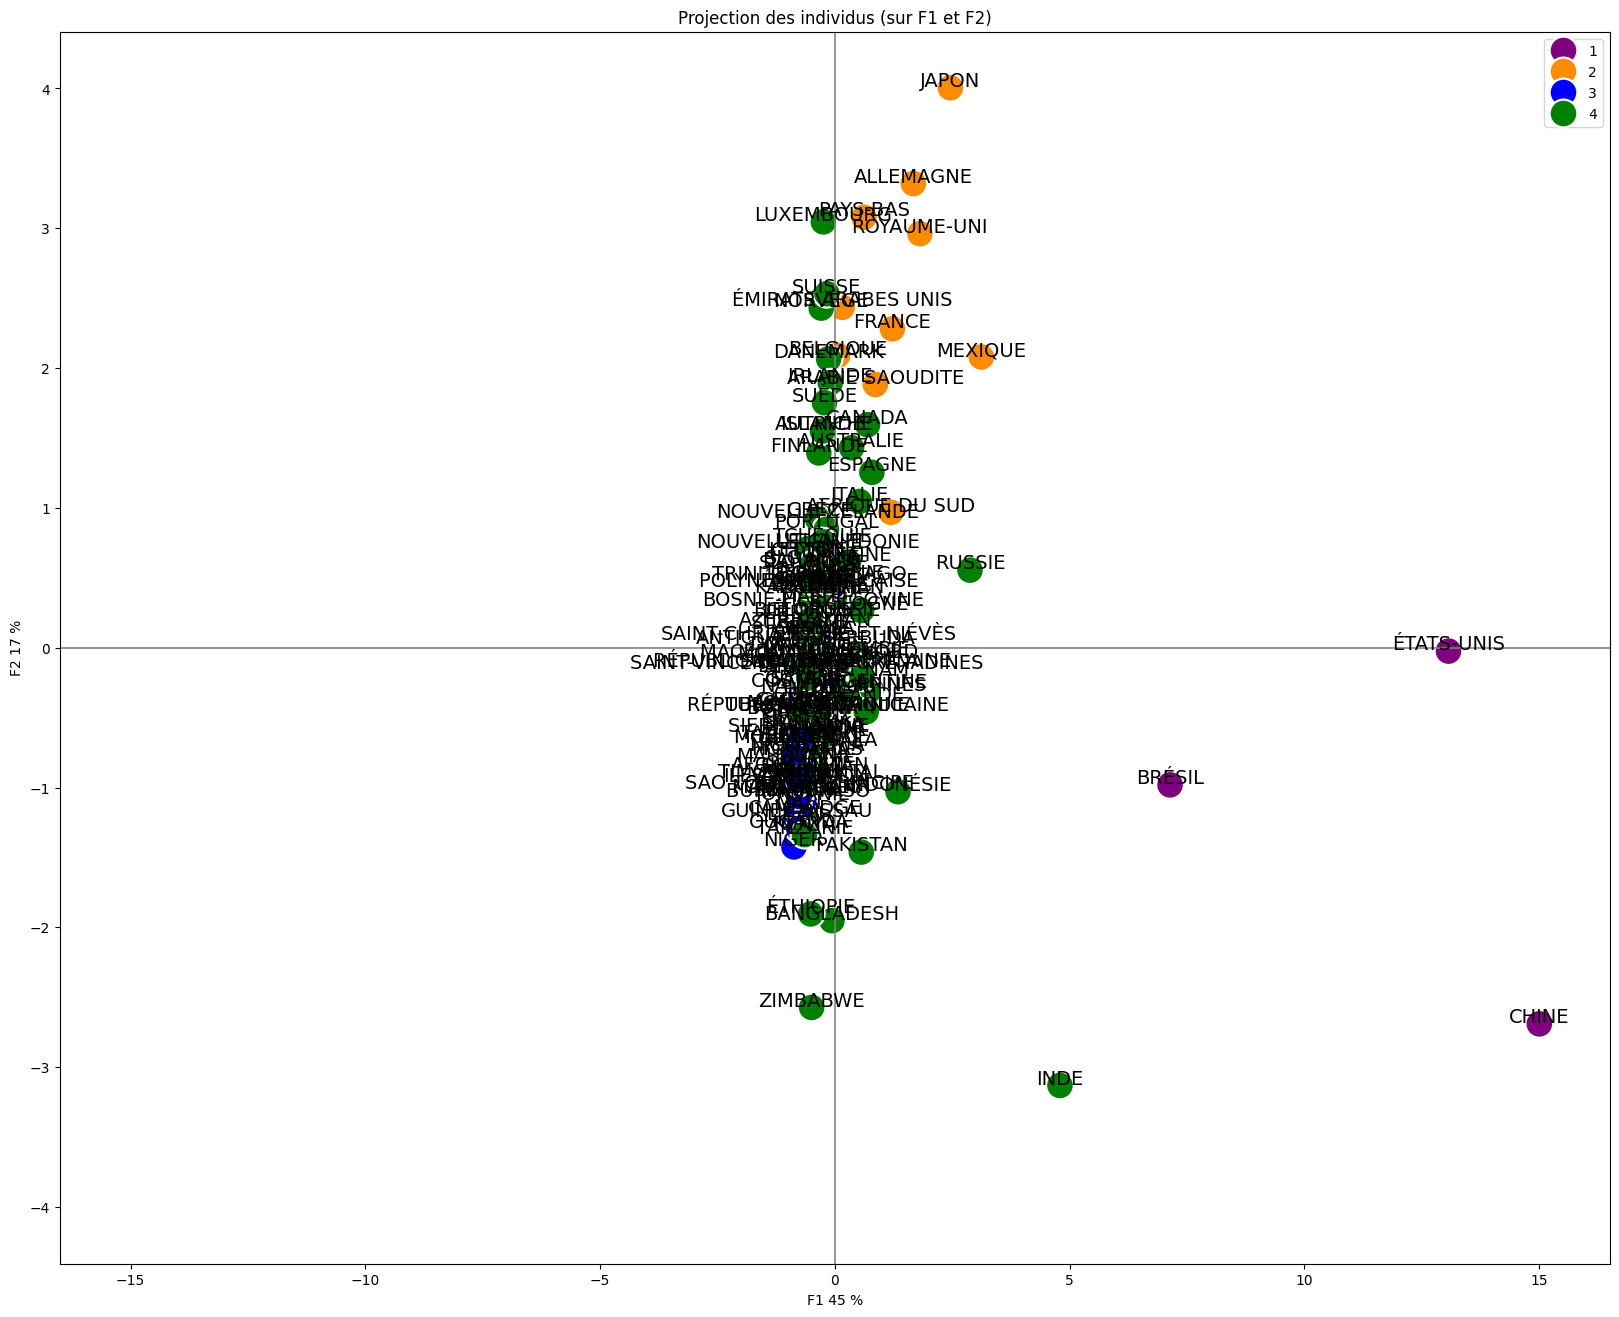

In [53]:
# CAH
palette_clusters_cah={
    1: 'purple',
    2: 'darkorange',
    3: 'blue',
    4: 'green'
}
display_factorial_planes(
    X_projected=X_proj,
    x_y=[0, 1],
    pca=pca,
    labels=names,
    clusters=cluster_CAH,
    figsize=[20, 16],
    marker="o",
    point_size=400,
    palette=palette_clusters_cah
)

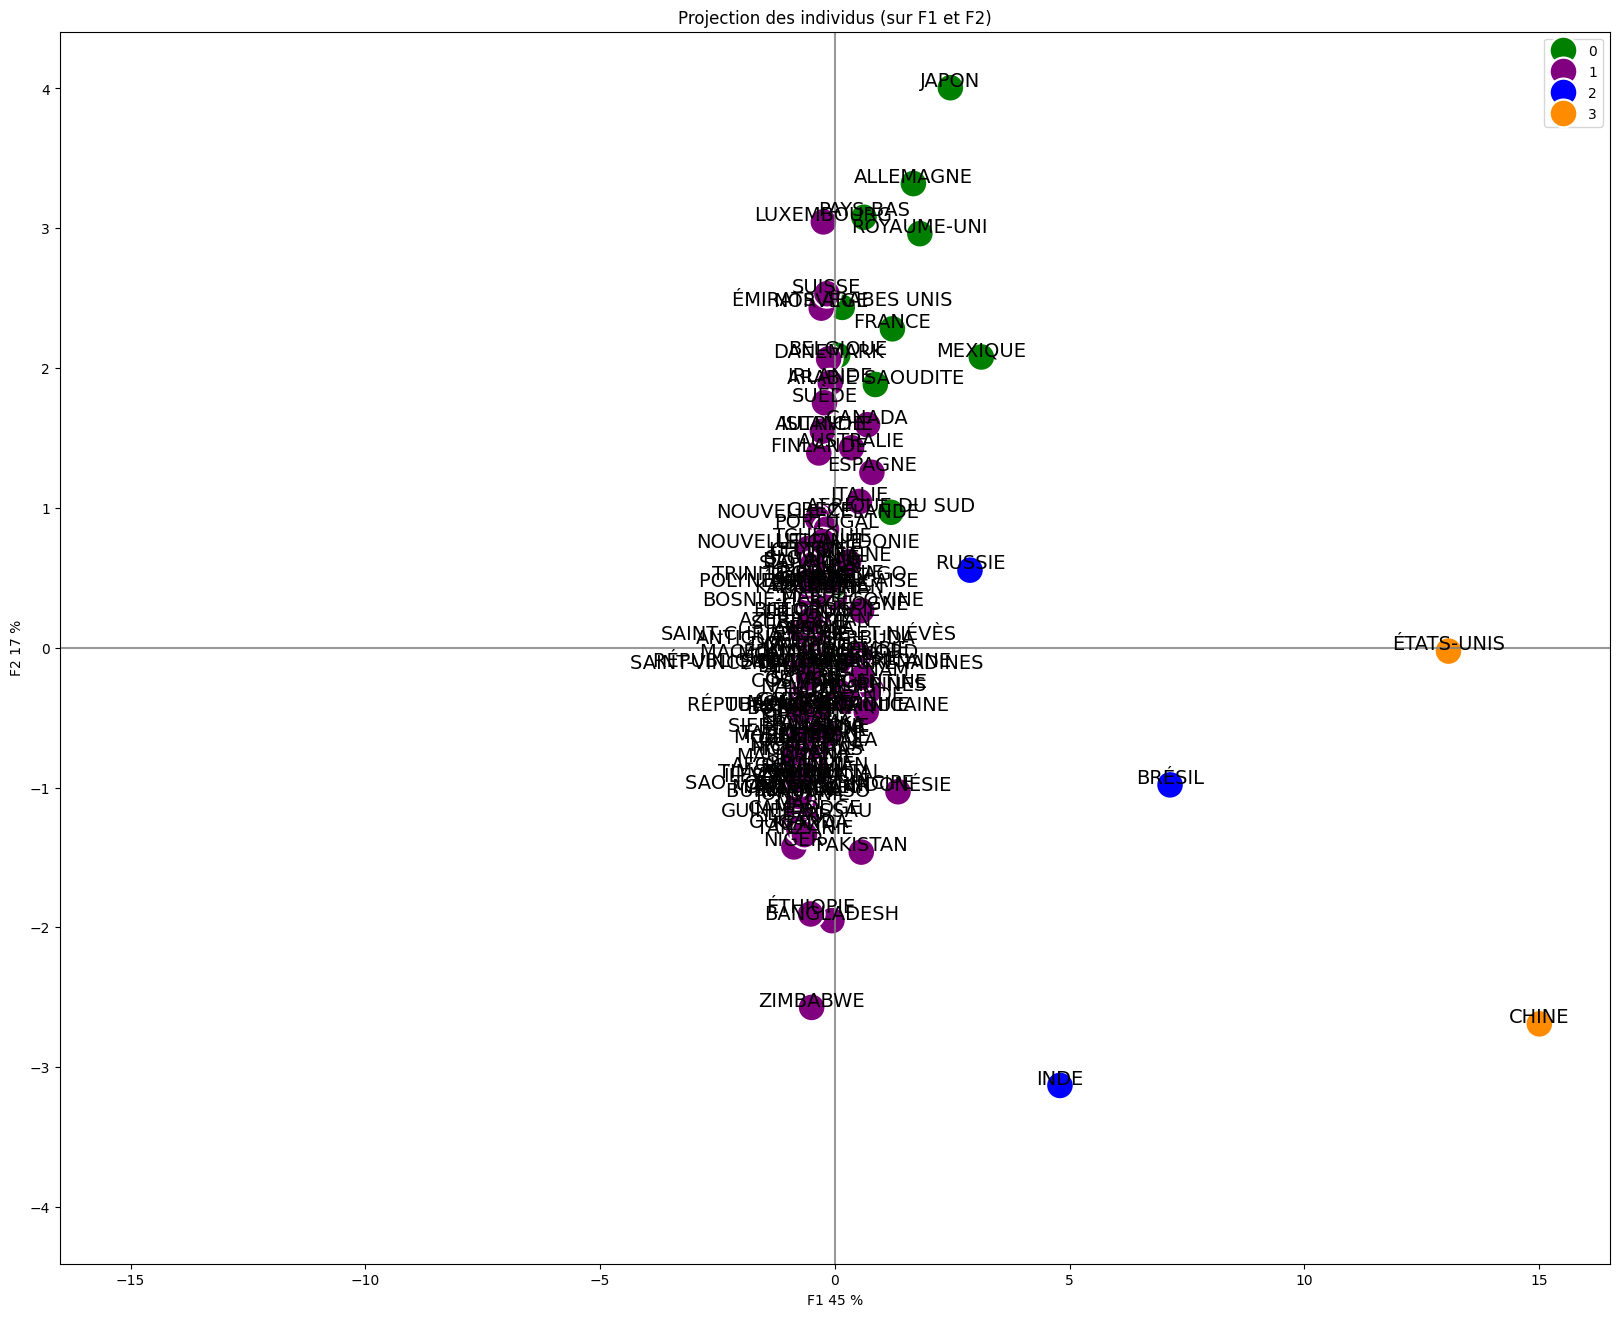

In [54]:
# K-means
palette_clusters_kmeans = {
    0:'green',
    1:'purple',
    2:'blue',
    3:'darkorange'
}
display_factorial_planes(
    X_projected=X_proj,
    x_y=[0, 1],
    pca=pca,
    labels=names,
    clusters=cluster_kmeans,
    figsize=[20, 16],
    marker="o",
    point_size= 400,
    palette=palette_clusters_kmeans
)